# Multiple Linear Regression

## Overview

In multiple linear regression multiple independend variables are used. It can be seen as extension of simple linear regression, because it uses the same approach. The difference is in multiple linear regression multiple coeficents are used. It uses the following formula:

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$$

We can use different notation too using vectors.

$$\hat{y} = \mathbf{\theta}^\top X$$


$$ \mathbf{\theta}^\top = \big[ \theta_1, \theta_2, \theta_3, \dots, \theta_n \big] $$

$$\begin{align}
    X &= \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{n}
         \end{bmatrix}
\end{align}$$

## Practice

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model

In [2]:
data = pd.read_csv("2-dataset.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


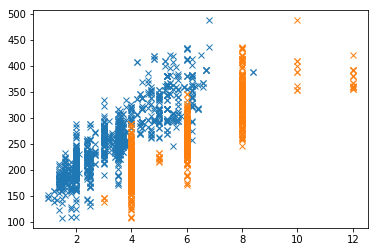

In [3]:
plt.plot(data.ENGINESIZE, data.CO2EMISSIONS, 'x', \
         data.CYLINDERS, data.CO2EMISSIONS, 'x')
plt.show()

In [4]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [5]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[28.29740182  9.10514565]]


In [6]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 950.25
Variance score: 0.78


Plotting in 3d.

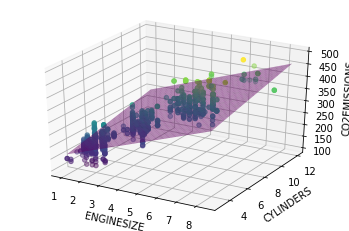

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

zdata = data.CO2EMISSIONS
xdata = data.ENGINESIZE
ydata = data.CYLINDERS
ax.scatter3D(xdata, ydata, zdata, c=zdata);

x_surf, y_surf = np.meshgrid(np.linspace(data.ENGINESIZE.min(), data.ENGINESIZE.max(), 100), \
                             np.linspace(data.CYLINDERS.min(), data.CYLINDERS.max(), 100))
onlyX = pd.DataFrame({'ENGINESIZE': x_surf.ravel(), 'CYLINDERS': y_surf.ravel()})
fittedY = regr.predict(onlyX)
ax.plot_surface(x_surf, y_surf, fittedY.reshape(x_surf.shape), color='Purple', alpha=0.5)

ax.set_xlabel('ENGINESIZE')
ax.set_ylabel('CYLINDERS')
ax.set_zlabel('CO2EMISSIONS')

plt.show()